## **Tugas 8, Komputasi Nuklir**
**Dhiya Salma Salsabila/24923304**

## <center>**Difusi Neutron**</center> 

**Persamaan difusi neutron 1 grup**
$$ D \nabla^2 \phi_{(r,z)} - \Sigma_{a} \phi_{(r,z)} = S$$

**Laplacian silinder arah (r,z):**
$$ \nabla^2 f_{(r,z)} = \frac{1}{r} \frac{\partial}{\partial r} (r \frac{\partial f_{(r,z)}}{\partial r})+ \frac{\partial^2 f_{(r,z)}}{\partial z^2} $$
$$ \nabla^2 f_{(r,z)} = \frac{1}{r} (r \frac{\partial}{\partial r} \frac{\partial f_{(r,z)}}{\partial r}+ \frac{\partial r}{\partial r} \frac{\partial f_{(r,z)}}{\partial r})+ \frac{\partial^2 f_{(r,z)}}{\partial z^2} $$
$$ \nabla^2 f_{(r,z)} = \frac{1}{r} (r \frac{\partial^2 f_{(r,z)}}{\partial r^2}+ 1 \frac{\partial f_{(r,z)}}{\partial r})+ \frac{\partial^2 f_{(r,z)}}{\partial z^2} $$
$$ \nabla^2 f_{(r,z)} =  \frac{\partial^2 f_{(r,z)}}{\partial r^2}+ \frac{1}{r} \frac{\partial f_{(r,z)}}{\partial r}+ \frac{\partial^2 f_{(r,z)}}{\partial z^2} $$

Diskritisasi arah r, dengan menggunakan central difference
$$ \frac{\partial f_{(r,z)}}{\partial r} = \frac{f_{(r+\Delta r, z)}- f_{(r-\Delta r,z)}}{2 \Delta r} $$
$$ \frac{\partial^2 f_{(r,z)}}{\partial r^2} = \frac{f_{(r+\Delta r, z)}-2 f_{(r,z)}+ f_{(r-\Delta r,z)}}{\Delta r^2} $$
Diskritisasi arah z, dengan menggunakan central difference
$$ \frac{\partial^2 f_{(r,z)}}{\partial z^2} = \frac{f_{(r, z+\Delta z)}-2 f_{(r,z)}+ f_{(r,z-\Delta z)}}{\Delta z^2} $$

Maka setelah di diskritisasi persamaan menjadi
**$$ \nabla^2 f_{(r,z)} = \frac{f_{(r+\Delta r, z)}-2 f_{(r,z)}+ f_{(r-\Delta r,z)}}{\Delta r^2} + \frac{1}{r} \frac{f_{(r+\Delta r, z)}- f_{(r-\Delta r,z)}}{2 \Delta r} + \frac{f_{(r, z+\Delta z)}-2 f_{(r,z)}+ f_{(r,z-\Delta z)}}{\Delta z^2} $$**

Maka persamaan difusi menjadi
$$ D \frac{\phi_{(r+\Delta r, z)}-2 \phi_{(r,z)}+ \phi_{(r-\Delta r,z)}}{\Delta r^2} + \frac{1}{r} \frac{\phi_{(r+\Delta r, z)}- \phi_{(r-\Delta r,z)}}{2 \Delta r} + \frac{\phi_{(r, z+\Delta z)}-2 \phi_{(r,z)}+ \phi_{(r,z-\Delta z)}}{\Delta z^2} - \Sigma_{a} \phi_{(r,z)} = S$$

Dikelompokkan terhadap $\phi$
$$ \phi_{(r,z-\Delta z)} (\frac{D}{\Delta z^2}) + \phi_{(r-\Delta r,z)} (\frac{D}{\Delta r^2}-\frac{D}{2r \Delta r}) -\phi_{(r,z)} (\frac{2D}{\Delta r^2}+\frac{2D}{\Delta z^2}+\Sigma_{a}) + \phi_{(r+\Delta r, z)} (\frac{D}{\Delta r^2}+\frac{D}{2r \Delta r})+ \phi_{(r, z+\Delta z)} (\frac{D}{\Delta z^2})  = S$$

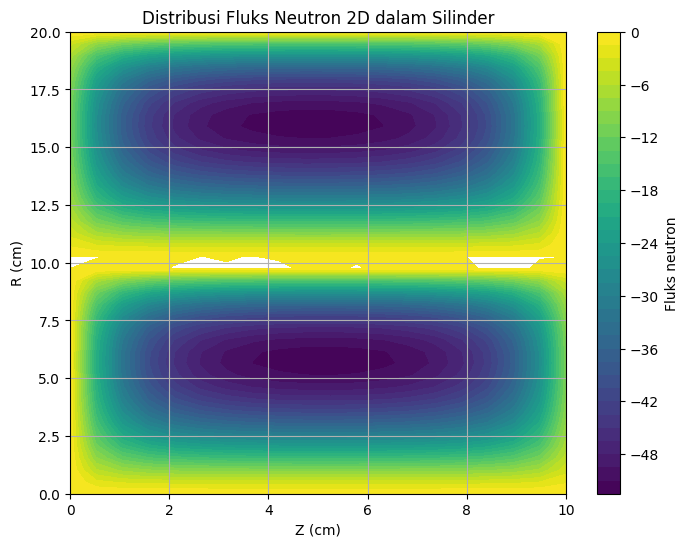

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
R = 10.0  # Jari-jari tabung (cm)
Z = 20.0  # Tinggi tabung (cm)
nr = 20   # Diskritisasi arah r
nz = 40   # Diskritisasi arah z
D = 1.0   # Koefisien difusi (cm^2/s)
SigmaA = 0.1  # Penampang lintang absorpsi (/cm)
sumber = 10.0  # Sumber neutron tetap (neutron/cm^3/s)

# Diskritisasi ruang
dr = R / (nr - 1)
dz = Z / (nz - 1)
r = np.linspace(0, R, nr)
z = np.linspace(0, Z, nz)
size = nr * nz

# Matriks A dan sumber S
A = np.zeros((size, size))
S = np.zeros(size)

# Mengisi Matriks A
for j in range(nz):
    for i in range(nr):
        k = i + j * nr  # Linear index untuk node (i, j)

        # Kondisi batas radial
        if i == 0:  # Symmetry condition di r=0
            A[k, k] = 1.0
            S[k] = 0.0
        elif i == nr - 1:  # Batas luar r=R
            A[k, k] = 1.0
            S[k] = 0.0
        # Kondisi batas aksial
        elif j == 0 or j == nz - 1:  # z=0 dan z=Z
            A[k, k] = 1.0
            S[k] = 0.0
        else:
            # Elemen utama
            A[k, k] = -2 * D / dr**2 - 2 * D / dz**2 - SigmaA

            # Neighbor elemen radial
            A[k, k - 1] = D / dr**2 + D / (2 * dr * r[i])
            A[k, k + 1] = D / dr**2 - D / (2 * dr * r[i])

            # Neighbor elemen aksial
            A[k, k - nr] = D / dz**2
            A[k, k + nr] = D / dz**2

            # Sumber neutron
            S[k] = sumber

# Menyelesaikan sistem linier A . phi = S
phi = np.linalg.solve(A, S)

# Memformat solusi ke bentuk 2D
phi_2d = phi.reshape((nr, nz))

# Visualisasi fluks neutron
r_grid, z_grid = np.meshgrid(z, r)
plt.figure(figsize=(8, 6))
plt.contourf(z_grid, r_grid, phi_2d, levels=50, cmap="viridis")
plt.colorbar(label="Fluks neutron")
plt.xlabel("Z (cm)")
plt.ylabel("R (cm)")
plt.title("Distribusi Fluks Neutron 2D dalam Silinder")
plt.grid()
plt.show()


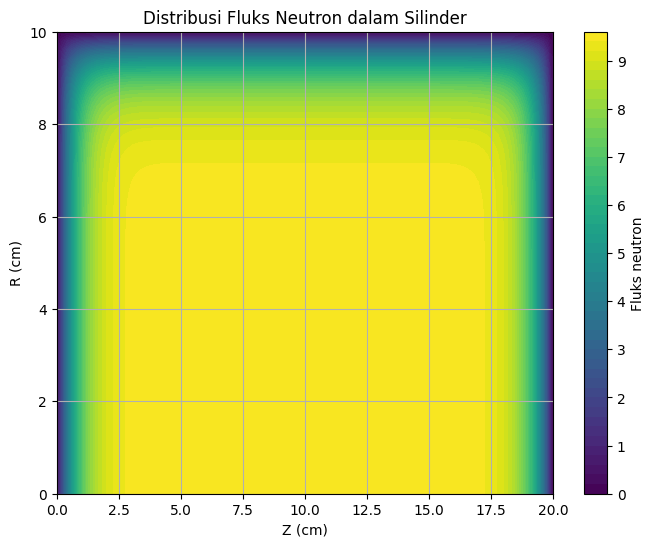

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
R = 10.0  # Jari-jari tabung (cm)
Z = 20.0  # Tinggi tabung (cm)
nr = 50   # Diskritisasi arah r
nz = 100  # Diskritisasi arah z
D = 1.0   # Koefisien difusi (cm^2/s)
SigmaA = 0.1  # Penampang lintang absorpsi (/cm)
sumber = 10.0  # Sumber neutron tetap (neutron/cm^3/s)
dt = 0.01  # Langkah waktu
nt = 100   # Jumlah langkah waktu

# Diskritisasi ruang
dr = R / (nr - 1)
dz = Z / (nz - 1)
r = np.linspace(0, R, nr)
z = np.linspace(0, Z, nz)

# Matriks phi
phi = np.zeros((nr, nz))  # Solusi fluks neutron
phi_new = np.zeros_like(phi)

# Sumber tetap
S = np.full_like(phi, sumber)

# Iterasi waktu
for n in range(nt):
    for i in range(1, nr - 1):
        for j in range(1, nz - 1):
            radial_term = ((phi[i + 1, j] - 2 * phi[i, j] + phi[i - 1, j]) / dr**2 + (phi[i + 1, j] - phi[i - 1, j]) / (2 * r[i] * dr))
            axial_term = (phi[i, j + 1] - 2 * phi[i, j] + phi[i, j - 1]) / dz**2
            phi_new[i, j] = (phi[i, j] + dt * (D * (radial_term + axial_term) - SigmaA * phi[i, j] + S[i, j]))
    
    # Kondisi batas
    phi_new[:, 0] = 0  # Batas z = 0
    phi_new[:, -1] = 0  # Batas z = Z
    phi_new[0, :] = phi_new[1, :]  # Batas simetri di r = 0
    phi_new[-1, :] = 0  # Batas r = R
    
    phi = phi_new.copy()  # Update solusi

# Visualisasi hasil akhir
plt.figure(figsize=(8, 6))
plt.contourf(z, r, phi, levels=50, cmap='viridis')
plt.colorbar(label='Fluks neutron')
plt.xlabel('Z (cm)')
plt.ylabel('R (cm)')
plt.title('Distribusi Fluks Neutron dalam Silinder')
plt.grid(True)
plt.show()
